In [2]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np

from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

#pip install pyclustering (executar no Anaconda Prompt)

ModuleNotFoundError: No module named 'pyclustering'

# Agrupamento com k-medoids

(-0.5, 849.5, 598.5, -0.5)

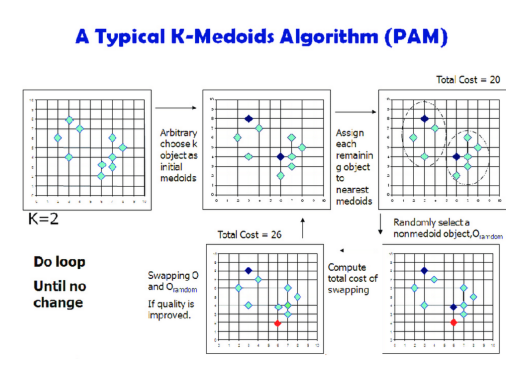

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as img

imagem = img.imread('k_medoid.png')
plt.imshow(imagem)
plt.axis('off')

In [6]:
# Carregamento da base de dados
iris = datasets.load_iris()

In [7]:
# Configuração dos parâmetros do k-medoids, utilizando somente as duas primeiras colunas da base de dados por causa da visualização apenas
# 3, 12 e 20 são índices aleatórios de registros da base de dados (inicialização)
cluster = kmedoids(iris.data[:, 0:2], [3, 12, 20])
# Visualização dos pontos escolhidos (3, 12 e 20)
cluster.get_medoids()

NameError: name 'kmedoids' is not defined

In [ ]:
# Aplicação do algoritmo para o agrupamento, obtenção da previsões (grupo de cada registro) e visualização dos medoides
cluster.process()
previsoes = cluster.get_clusters()
medoides = cluster.get_medoids()
#lista de 3 elementos, com os indices dos registros do cluster
previsoes

In [ ]:
# Visualização do agrupamento
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:,0:2])
v.append_cluster(medoides, data = iris.data[:,0:2], marker = '*', markersize = 20)
v.show()

In [ ]:
# Código para criar duas listas, uma com os grupos reais da base de dados e outra com os valores dos grupos
# Utilizado posteriormente para visualização da matriz de contingência
lista_previsoes = []
lista_real = []
for i in range(len(previsoes)):
     for j in range(len(previsoes[i])):
        lista_previsoes.append(i)
        lista_real.append(iris.target[previsoes[i][j]])

In [ ]:
# Geração da matriz de contingência, comparando os grupos reais com os grupos previstos
lista_previsoes = np.asarray(lista_previsoes)
lista_real = np.asarray(lista_real)
resultados = confusion_matrix(lista_real, lista_previsoes)
resultados